# Data Analysis with Python
### Table of contents
[Chapter 1: Importing Data Sets](#chapter-1-importing-data-sets)    
[Chapter 2: Data Wrangling](#chapter-2-data-wrangling)  
[Chapter 3: Exploratoty Data Analysis](#chapter-3-exploratory-data-analysis)    
[Chapter 4: Model Development](#chapter-4-model-development)    
[Chapter 5: Model Evaluation and Refinement](#chapter-5-model-evaluation-and-refinement)    
[Final Assignment](#final-assignment)   

## Chapter 1: Importing Data Sets
### Python Packages for Data Science
1. **Scientifics Computing** Libraries
- **Pandas** (Data Structures & Tools)
- **NumPy** (Arrays & Matrices)
- **SciPy** (Integrals, solving differential equations, optimisations)
2. **Visualisation** Libraries
- **Matplotlib** (plots & graphs, most popular)
- **Seaborn** (plots: heat maps, time series, violin plots)
3. **Algorithmic** Libraries
- **Scikit-learn** (Machine Learning: Regression, classification, and so on)
- **Statsmodels** (Explore data, estimate statistical models, and perform statistical tests)

### Importing Data
- Process of loading and reading data into Python from various resources
- Two important properties:
    - Format: .csv, .json, .xlsx, .hdf,...
    - File Path of dataset:
        - Computer: */Desktop/mydata.csv*
        - Internet: *https://archive.ics.uci.edu/autos/imports-85.data*
#### Importing and Exporting a CSV in Python
```py
import pandas as pd
url = 'https://archive.ics.uci.edu/autos/imports-85.data'
# Import
df = pd.read_csv(url, header = None) # Dataset without the header
# Printing the DataFrame in Python
df # print the entire DataFram
df.head(n) # Show the first "n" rows of DataFrame
df.tail(n) # Show the bottom "n" rows of DataFrame
# Adding headers
## Replace default header (by df.columns = headers)
headers = ["symboling", "normalised-losses", "make",...]
df.columns = headers
# Export
path = "C:\Windows\...\ automobile.csv"
df.to_csv(path)
```
|Data Format|Read|Save|
|-----------|----|----|
|csv|pd.read_csv()|df.to_csv()|
|json|pd.rea_json()|df.to_json()|
|Excel|pd.read_excel()|df.to_excel()|
|sql|pd.read_sql()|df.to_sql()|

### Getting Started Analysing Data in Python
- Basic insights from the data
    1. Understand your data before you begin any analysis
    2. Should check:
        - Data Typqes
        - Data Distributions
    3. Locate potential issues with the data
#### Data Types
|Pandas Type|Native Python Type|Description|
|-|-|-|
|object|string|numbers and strings|
|int64|int|numeric characters|
|float64|float|numeric characters with decimals|
|datatime64, timedelta[ns]| N/A (but see the *datatime* module in Python's standard library)|time data|
Why check data types?
- potential infor and type mismatch
- compatibility with Python methods
We use `dataframe.dtypes` to check data types
```py
df.dtypes
# Check a statistical summary
df.describe()
# Check full summary statistics (including object type attributes)
df.describe(include = 'all')
# Check a concise summary of DataFrame
df.info()
```

### Accessing Databases with Python
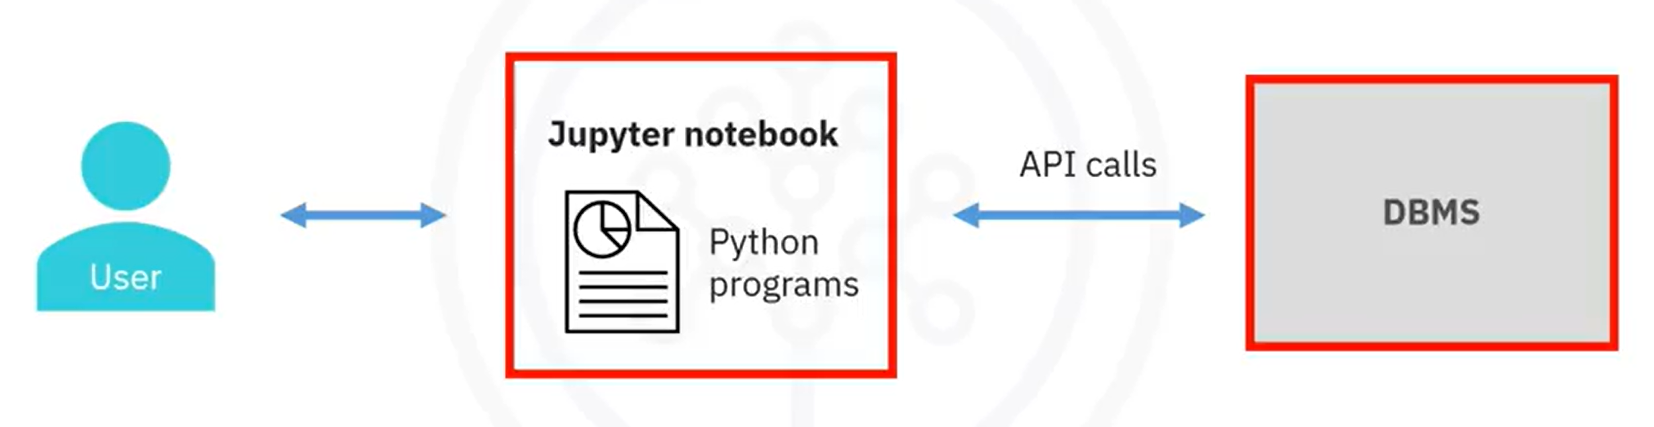
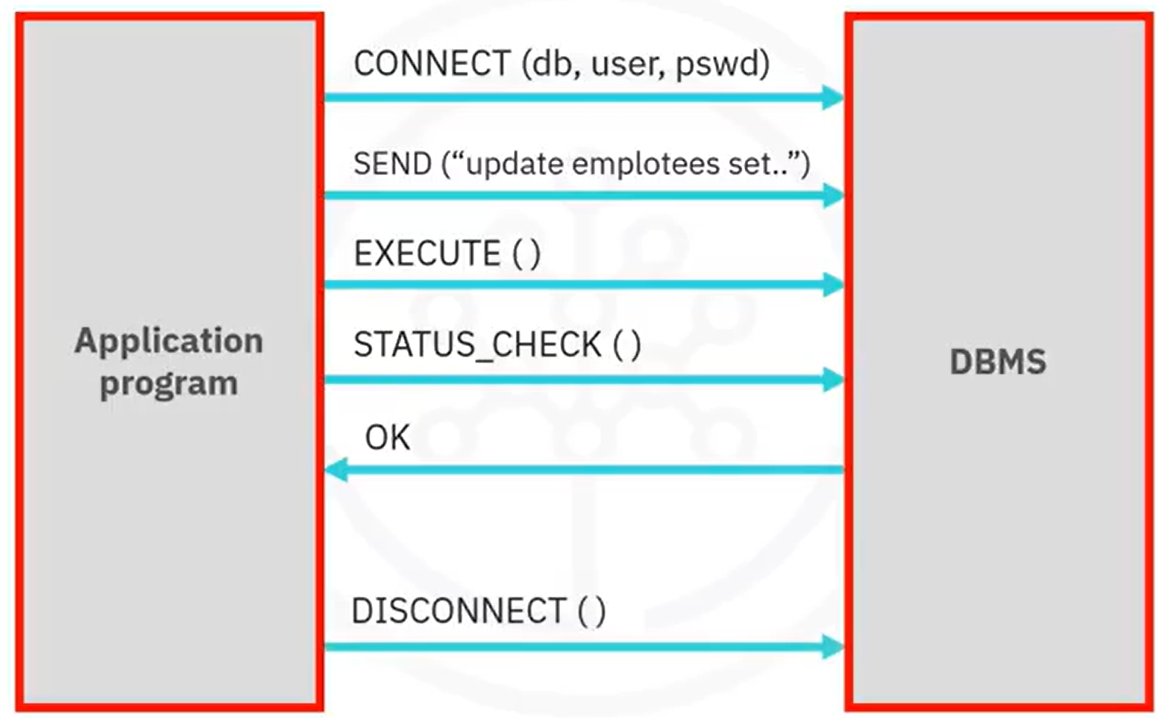
Concepts of the Python DB API
1. Connection Objects
    - Database connections
    - Manage transactions
2. Cursor Objects
    - Database Queries
What are Connection methods?
- cursor()
- commit()
- rollback()
- close()
Writing code using DB-API
```py
from dmodule import connect

# Create connection object
connection = connect('databasename', 'username', 'pswd')
# Create a cursor object to run queries and fetch results
cursor = connection.cursor()

# Run queries
cursor.execute('select * from mytable')
results = cursor.fetchall()

# Free resources to avoid usued connections
cursor.close()
connection.close()
```
### Lab: Importing Data Sets - Used Cars Pricing
[🔗 Open Lab: Importing Data Sets - Used Cars Pricing](lab_import_datasets_used_cars_pricing.ipynb)

### Overview: Laptop Pricing Data Set
[🔗 Open Overview: Laptop Pricing Data Set](overview_laptop_pricing_data_sets.pdf)

### Lab: Importing Data Sets - Laptop Pricing
[🔗 Open Lab: Importing Data Sets - Laptop Pricing](lab_importing_dataset_laptop_pricing.ipynb)

### Module 1 Cheat Sheet: Importing Data Sets
[🔗 Open Module 1 Cheat Sheet: Importing Data Sets](module1_cheatsheet.pdf)

## Chapter 2: Data Wrangling
### Pre-processing Data in Python
**Also know as:** Data Cleaning, Data Wrangling
- Accessing columns: `df[symboling']`, `df['body-style']
- Add value to each column: `df['symboling']=df['symboling']+1`

### Dealing with missing values in Python
- Missing values occur when no data calue is stored for a variable (feature) in a an observation.
- Could be represented as "?", "N/A", 0 or just a blank cell.

#### How to deal with missing value
1. **Check with the data collection source**
2. **Drop the missing values**
    - drop the variable
    - drop the data entry
3. **Replace the missing value**
    - replace it with an average (if similar datapoints)
    - replace it by frequency
    - replace it based on other functions
4. **Leave it as missing data**

#### How to drop misisng values in Python
Use `dataframe.dropna()` (axis=0 drops the entire row; axis=1 drops the entire column)

Example: 
```py
df.dropna(subset=['price'], axis=0, inplace=True)
df = df.dropna(subset=['price'], axis=0) # equivalent code
```

#### How to replace missing values in Python
Use `dataframe.replace(missing_value, new_value)`

Example: replace by the mean value
```py
mean = df['normalised-losses'].mean()
df['normalised-losses'].replace(np.nan, mean)
```

### Data Formatting
- Data is usually collected from different places and stored in different formats
- Bringing data into a common standard of expression allows users to make meaningful comparison

|Non-formatted|Formatted|
|-|-|
|- confusing <br> - hard to aggregate <br> - hard to compare| - more clear <br> - easy to aggregate <br> - easy to compare|

Example:
|City|City|
|-|-|
|N.Y.|New York|
|Ny|New York|
|NY|New York|
|New York|New York|

#### Applying calculations to an entire columns
Covert 'mpg' to 'L/100km' in Car dataset
|city-mpg|city-L/100km|
|-|-|
|21|11.2|
|21|11.2|
|19|12.4|
|...|...|
```py
df['city-mpg']= 235/df['city-mpg']

df.rename(columns={'city-mpg':'city-L/100km'}, inplace=True)
```
#### Incorrect data types
Sometimes the wrong data types is assigned to a feature
```py
df['price'].tail(5)
```
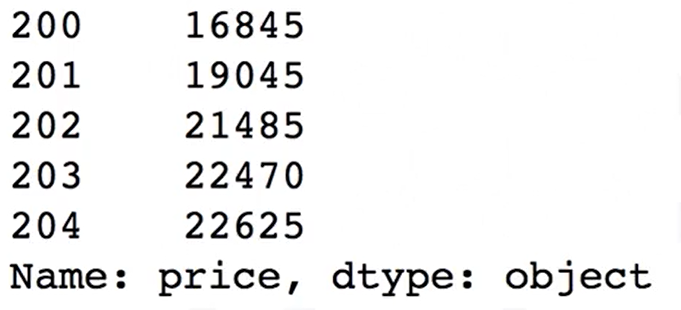


#### Correcting data types
- To *identify* data types: Use `dataframe.dtypes()` to identify data type
- To *convert* data types: Use `dataframe.astype()` to convert data type

Example: Convert data type to integer in column 'price'
```py
df['price']=df['price'].astype('int')
```

### Data Normalisation
- Uniform the features values with different range
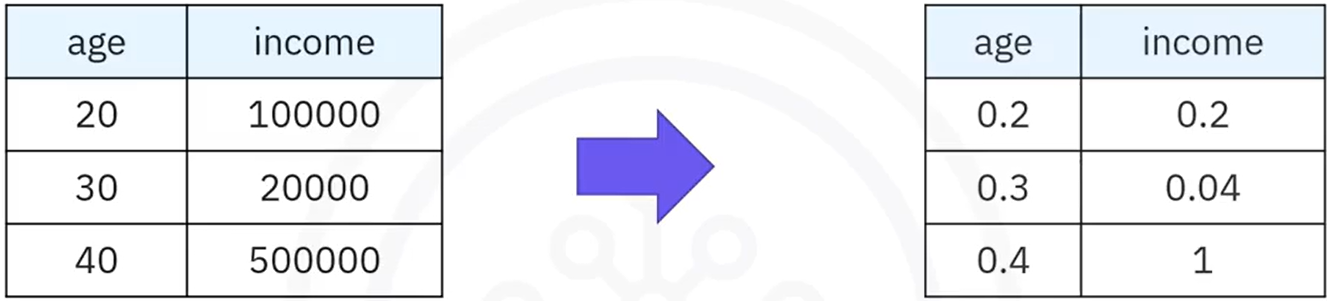

|Not-normalised|Normalised|
|-|-|
|- 'age' and 'income' are in different range. <br> - hard to compare <br> - 'income' will be influence the result more| - similar value range <br> - similar intrinsic influence on analytical model|

#### Methods of normalising data
Several approaches for normalisation:

1. **Simple Feature scaling**: makes new values range between 0 and 1.
$$x_{new} = \frac{x_{old}}{x_{max}}$$
2. **Min-Max**: results new values range between 0 and 1.
$$x_{new}= \frac{x_{old} - x_{min}}{x_{max} - x_{min}}$$
3. **Z-score** (or **Standard score**): results values hover around 0 and typically range between -3  and +3, but can be higher or lower.
$$x_{new}= \frac{x_{old} - \mu}{\sigma}$$

##### Simple Featuqres Scaling in Python
With Pandas:
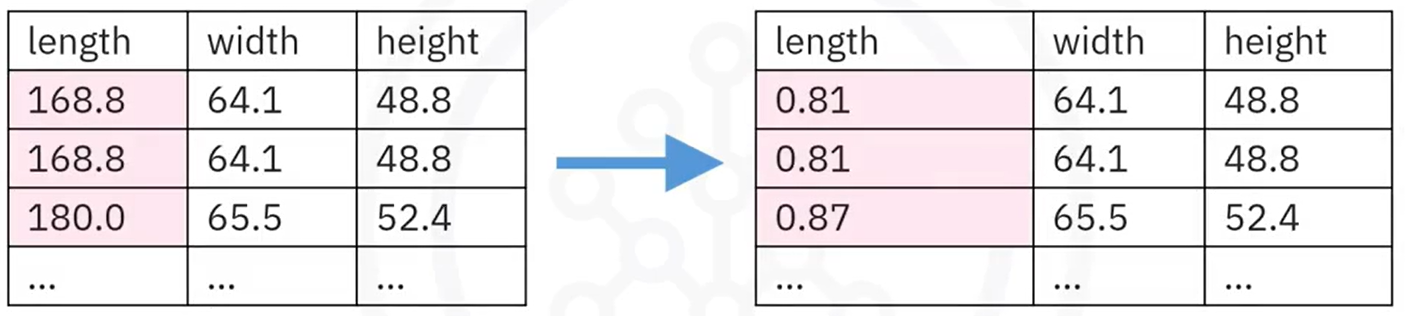

```py
df['length'] =(df['length'] - df['length'].min())/(df['length'].max() - df['length'].min())
```

##### Z-score
With Pandas:
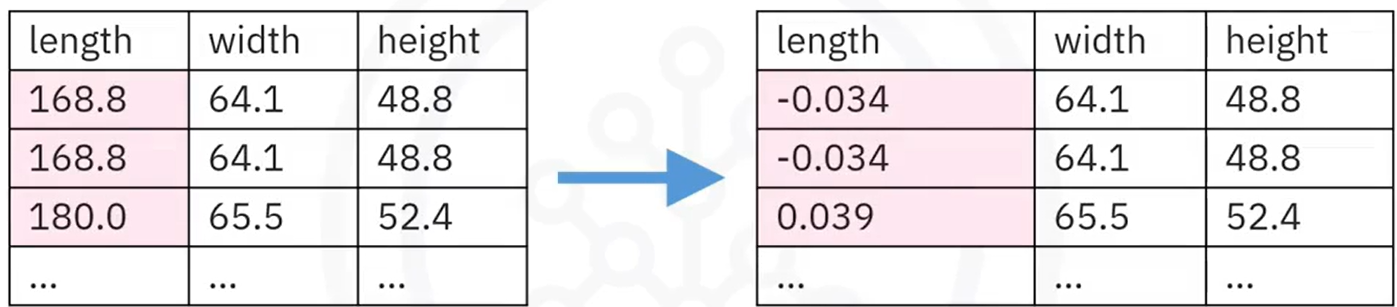

```py
df['length'] = (df['length'] - df['length'].mean())/df['length'].std()
```

### Binning
- **Binning**: Grouping of values into "bins"
- Convert numeric into categorical variables
- Group a set of numerical values into a set of "bins"
- "price" is an feature range from 5,000 to 45,500
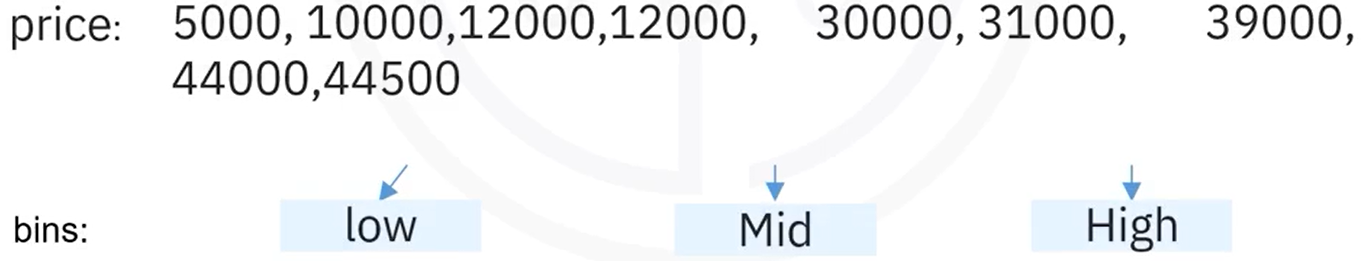
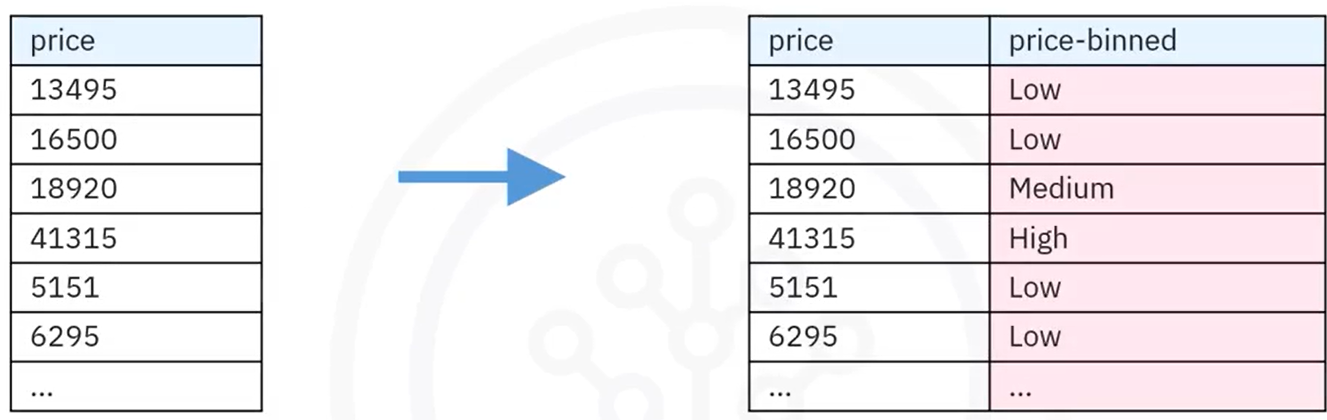

```py
bins = np.linspace(min(df['price']), max(df['price']), 4) 
# We need 3 bins, but we needs 4 numbers as devider
group_names = ['Low', 'Medium', 'High']
# We create a list group underscore names that contains the different bin names
df['price-binned'] = pd.cut(df['price'], bins, labels=group_names, include_lowest=True)
```
#### Visualising binned data
- Histograms
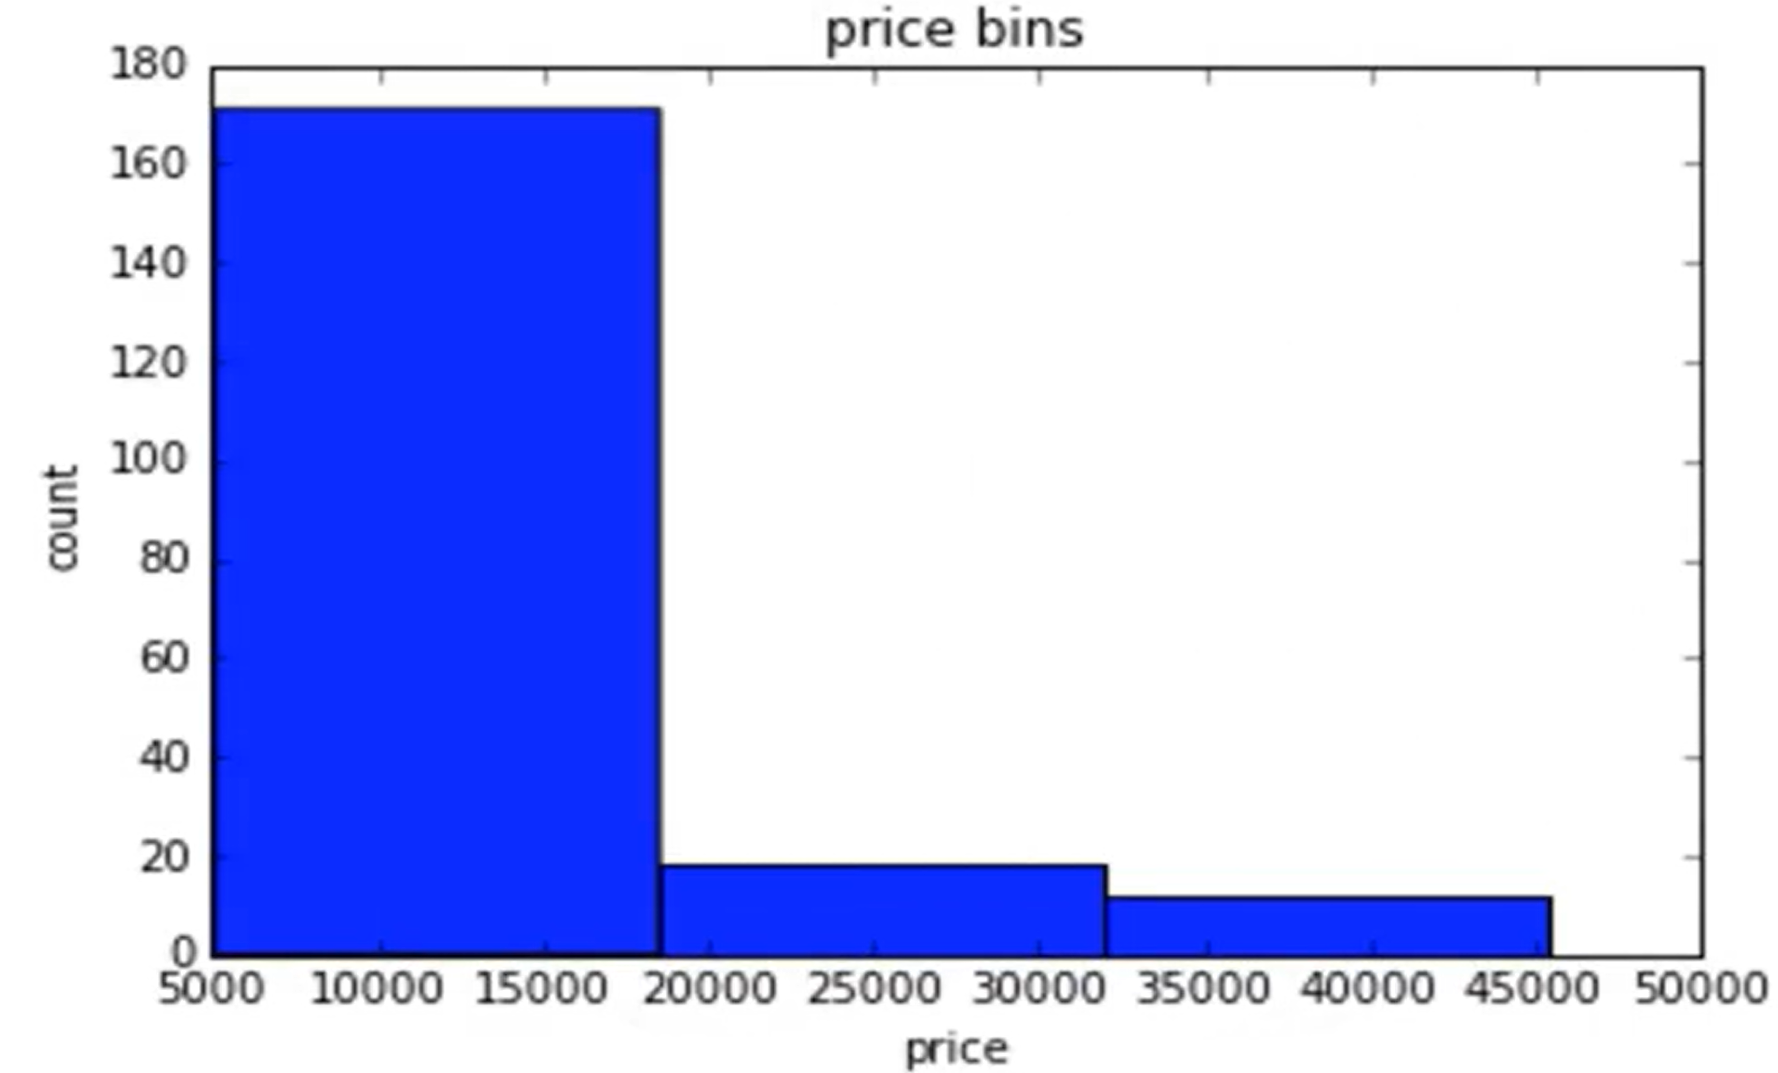

### Turning Categorical Variables into Quantitative Variables in Python
#### Categorical variables
Problem:
Most statistical models cannot take in the object/strings as input
Solution:
- Add dummy variables for each unique category
- Assign 0 or 1 in each category
#### Dummy variables in Python pandas
- Use pandas.get_dummies() method.
- Convert categorical variables to dummy variables (0 or 1)
```py
pd.get_dummies(df['fuel'])
```


## Chapter 3 Exploratory Data Analysis

## Chapter 4: Model Development

## Chapter 5: Model Evaluation and Refinement

## Final Assignment